In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [4]:
y_train = y_train.reshape(-1,1)

In [5]:
X_test = X_test.reshape(-1,28,28,1)

In [6]:
y_test = y_test.reshape(-1,1)

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train)

C:\Users\JMDESKTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [8]:
y_train_onehot = enc.transform(y_train).toarray()

In [10]:
y_train_onehot = np.array(y_train_onehot, dtype = 'float32')

In [11]:
y_test_onehot = enc.transform(y_test).toarray()

In [12]:
y_test_onehot = np.array(y_test_onehot, dtype='float32')

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape = (28,28,1), activation='relu', padding='SAME'))
model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, strides=1, padding='SAME'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 25,714,570
Trainable params: 25,714,570
Non-trainable params: 0
__________________________________________

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [21]:
model.fit(X_train, y_train_onehot, epochs=5, batch_size = 100)


Epoch 1/5
60000/60000 [==============================] - 237s 4ms/step - loss: 4.6313 - acc: 0.9347
Epoch 2/5
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0505 - acc: 0.9838
Epoch 3/5
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0298 - acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 249s 4ms/step - loss: 0.0217 - acc: 0.9928
Epoch 5/5
60000/60000 [==============================] - 254s 4ms/step - loss: 0.0247 - acc: 0.9926


In [23]:
predict = model.predict(X_test)
predict

array([[1.9509115e-11, 1.1588193e-11, 1.2664128e-08, ..., 9.9999785e-01,
        4.1487834e-11, 2.1383757e-06],
       [5.6461967e-18, 2.9695016e-15, 1.0000000e+00, ..., 4.3797084e-15,
        1.3849809e-17, 2.7176763e-18],
       [1.2362976e-09, 9.9999988e-01, 8.2343279e-09, ..., 3.3069096e-08,
        9.7359305e-08, 1.0787715e-11],
       ...,
       [1.5101595e-13, 2.2379420e-16, 1.7788790e-18, ..., 7.1390864e-13,
        3.9708867e-09, 9.3984917e-11],
       [8.1543473e-18, 7.2921270e-19, 2.1200920e-18, ..., 6.2443171e-13,
        2.9537633e-08, 2.2096429e-16],
       [1.7361876e-10, 1.6731174e-11, 7.8947500e-12, ..., 6.2760745e-18,
        3.9411399e-14, 1.6173680e-16]], dtype=float32)

In [24]:
predict01 = np.argmax(predict,1)
predict01

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
target = np.argmax(y_test_onehot, 1)
target

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
predict02 = (predict01 == target)

In [27]:
acc = np.sum(predict02)/len(predict02)
acc

0.9762

In [31]:
import matplotlib.pyplot as plt

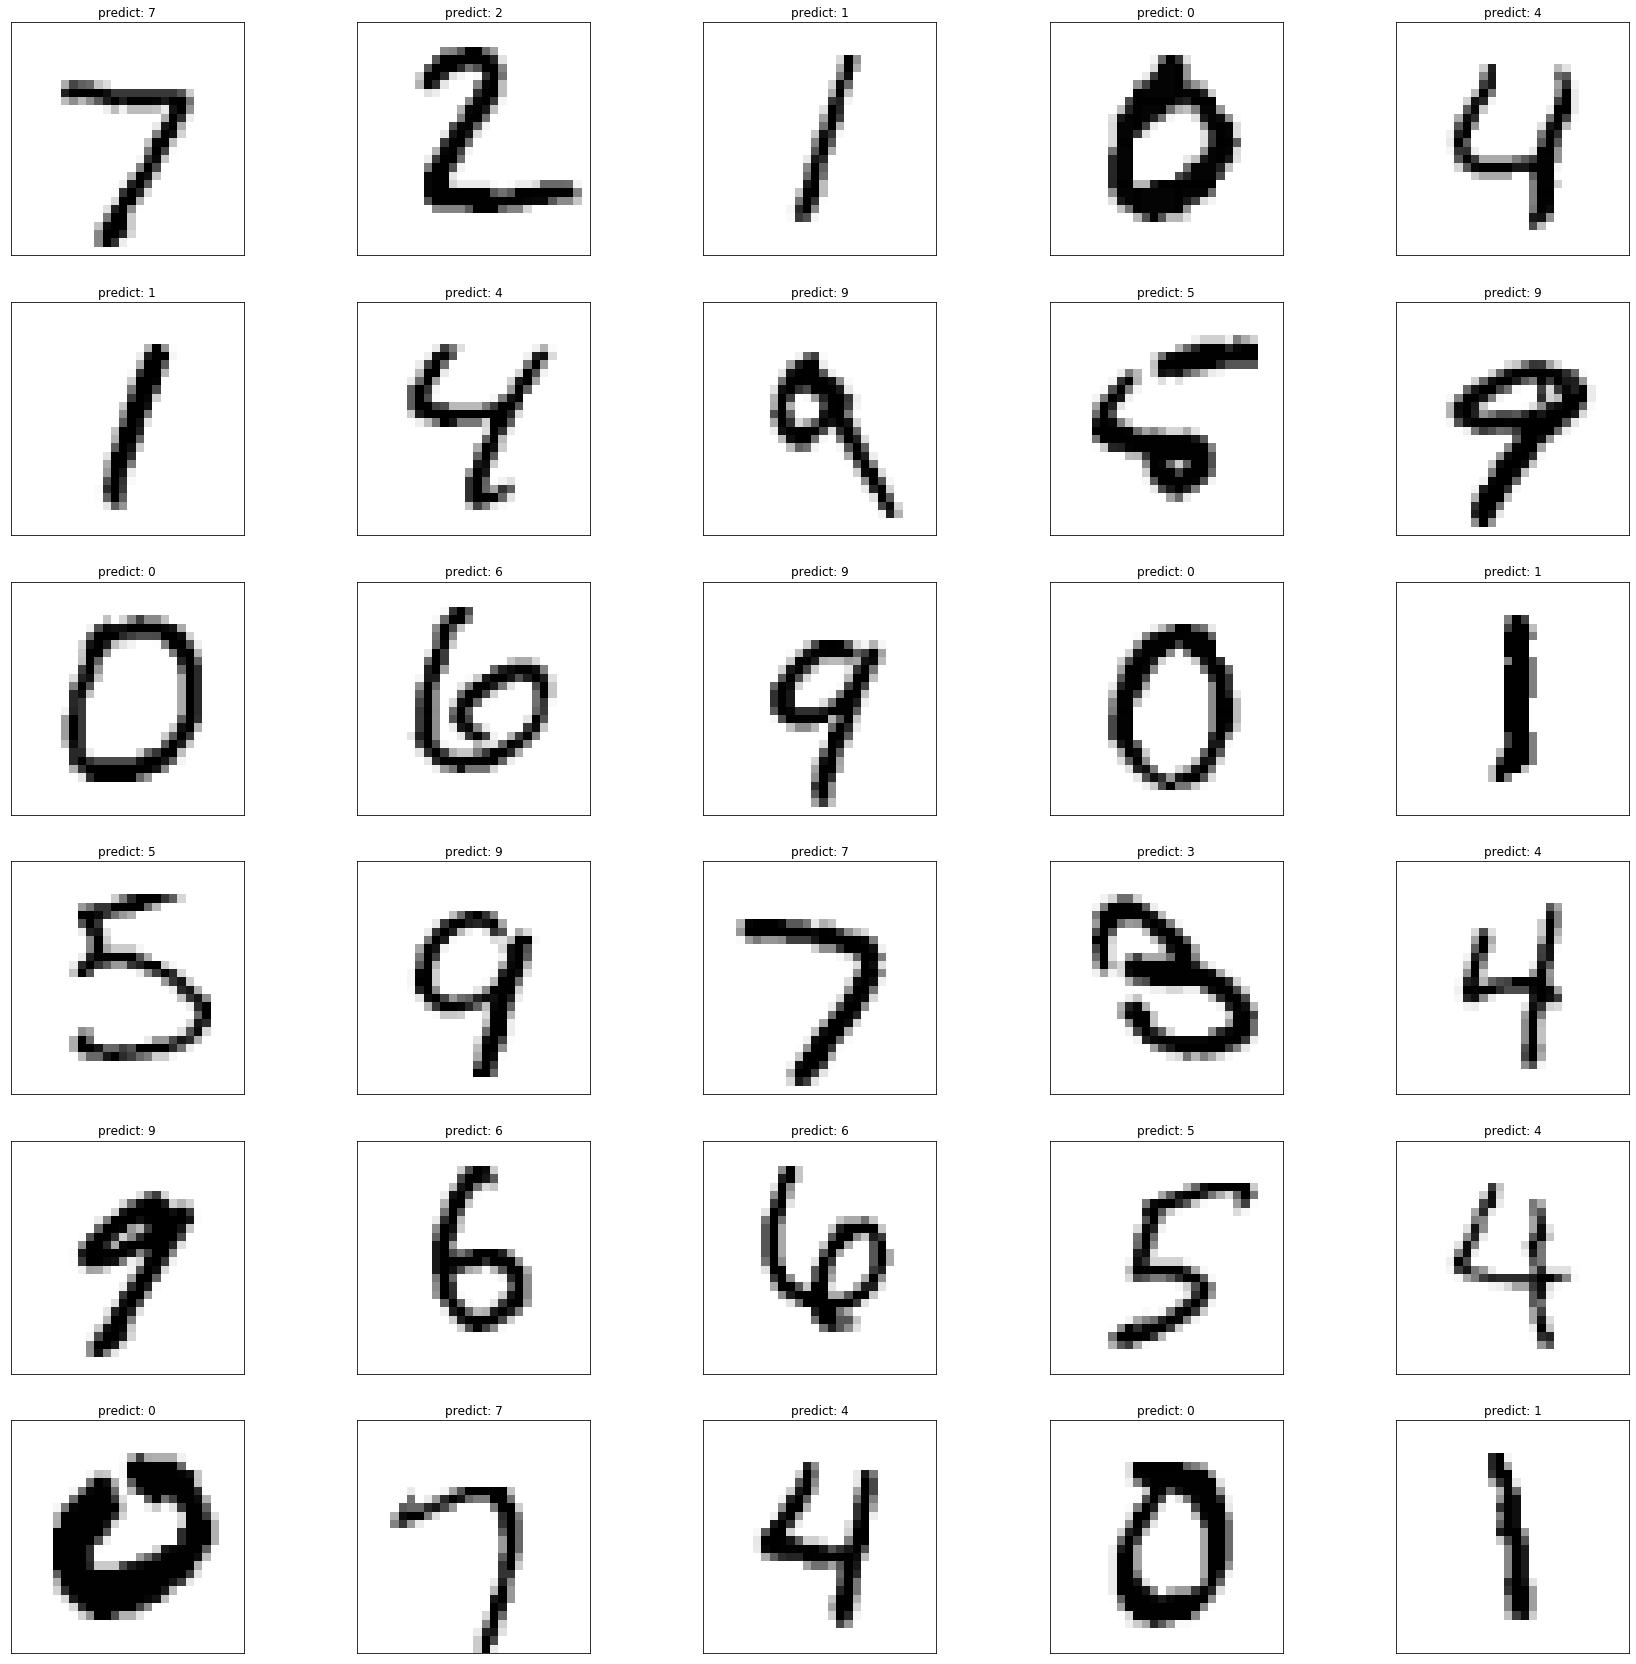

In [32]:
fig = plt.figure(figsize=(30,30))
for i in range(30):
    subplot = fig.add_subplot(6,5,i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('predict: %d' %predict01[i])
    subplot.imshow(X_test[i].reshape((28,28)),
                  cmap=plt.cm.gray_r)
plt.show()